# Mall Customer Analysis : Better.com Case Study
## Objective : To Draw Conclusions from the provided mall data by exploring the data, visualizing insights and define customer segments
#### Submitted By : Yashwant Sharma (yashwant.sharma1993@gmail.com)

## 1) Importing The Data And Initial Description Of Data

In [35]:
import pandas as pd
import numpy as np
mall_data = pd.read_csv('mall_customers.csv')
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [34]:
mall_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
cluster_id                0
dtype: int64

### The initial look at the data suggests that :

- It's a small dataset with just 200 customer entries
- Data contains 4 numerical & 1 categorical feature
- The features have different scales. Hence, we migh want to scale them if necessary
- The data seems to be clean. There are no missing or unwanted values. Hence, no need to clean the data before moving forward

## 2) Setting Up Environment To Save The Visualizations

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')

import os
PROJECT_ROOT_DIR = "."
PROJECT_ID = "BETTER_MALL_CS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 3) Plotting Charts To Vizualize & Understand The Data Better

Saving figure Gender Histogram


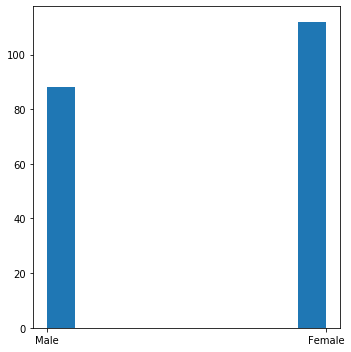

In [17]:
# Plotting Categorical Feature : Gender

plt.figure(figsize = (5,5))
mall_data['Gender'].hist()
plt.grid()
save_fig("Gender Histogram")

Saving figure Numeric Feature Histograms


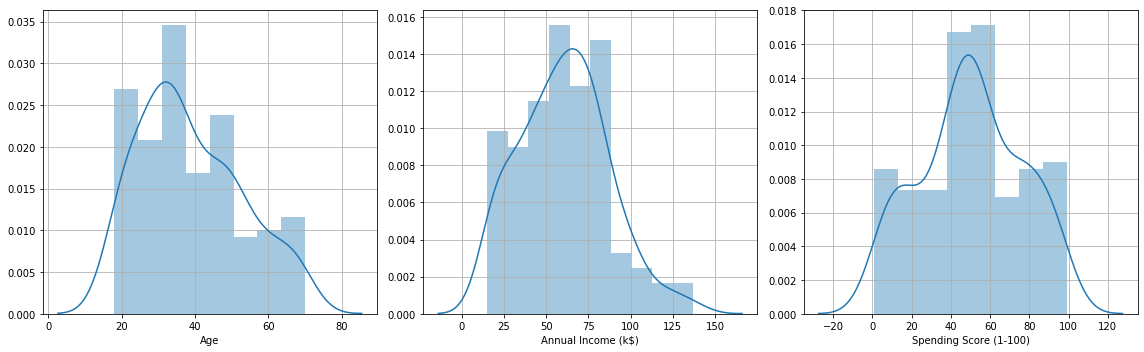

In [16]:
#Plotting Numerical Features
import seaborn as sns

plt.figure(figsize = (16,5))

plt.subplot(1, 3, 1)
sns.distplot(mall_data['Age'])
plt.grid()


plt.subplot(1, 3, 2)
sns.distplot(mall_data['Annual Income (k$)'])
plt.grid()


plt.subplot(1, 3, 3)
sns.distplot(mall_data['Spending Score (1-100)'])
plt.grid()


save_fig("Numeric Feature Histograms")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6861f0c10>,
      dtype=object)

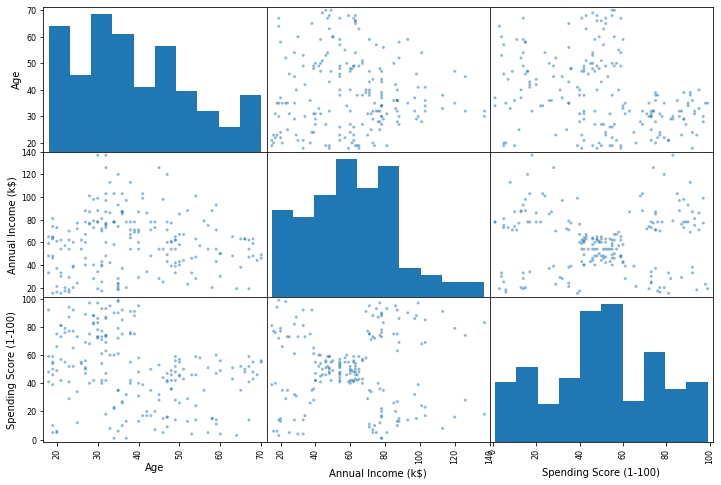

In [21]:
# Looking At The Scatter Matrix Across All 3 Features

from pandas.plotting import scatter_matrix

attributes = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
scatter_matrix(mall_data[attributes], figsize=(12, 8), grid=False)
#save_fig("Scatter Matrix")

Looking At The Scatter Matrix Plot, It Is Evident That There Are Customers Segments Based On Annual Income & Spending Score. There can be more ways to segment the customers hence I'll try to use a K-means Algorithm to identify the clusters

## 3) Feature Engineering

As seen from the exploratory data analysis, the features are on different scales. Hence, since I am using a K-Means Algorithm that uses eucledian distances to calculate clusters, I will scale the features so that clusters are correctly segmented.

Also, The Categorical Variables are to be converted to numerical so that it can be handled in the ML Algorithms


In [6]:
k_means_data=mall_data.iloc[:,1:]

In [7]:
k_means_data['Gender'].replace(['Female','Male'],[0,1],inplace=True)

In [8]:
k_means_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [9]:
# Scaling the features as k-means uses eucledian distances to come up to clusters

from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(np.array(k_means_data))

Saving figure Income-Spending Best K


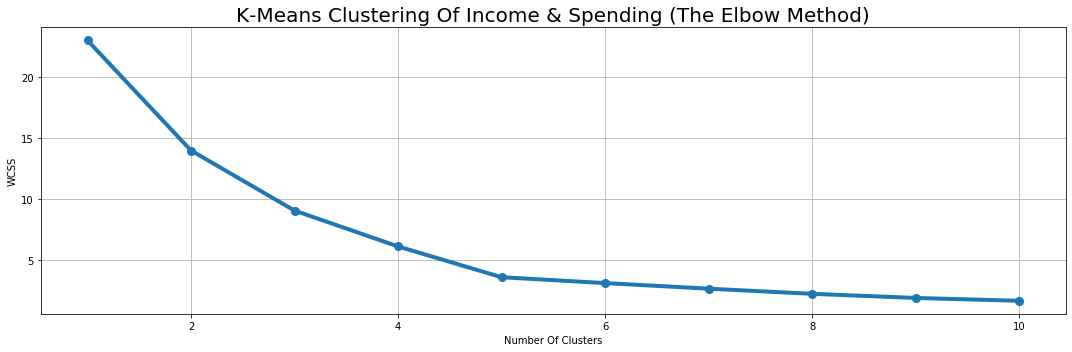

In [43]:
# Finding out best number of segments that can divide the data (k)

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled[:,2:])
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss, marker = "o", linewidth = 4, markersize = 8)
plt.title('K-Means Clustering Of Income & Spending (The Elbow Method)', fontsize = 20)
plt.ylabel('WCSS')
plt.xlabel('Number Of Clusters')
plt.grid()
save_fig("Income-Spending Best K")
plt.show()

The iteration was tried for many combinations of the data. However, the best way to segment the customers was using the Annual income and Spending score. As suggested by the curve, the elbow generated at n=5. Thus, will be training the algorithm at k=5

### 4) Clustering Using K-means

Saving figure K-Means Cluster 1


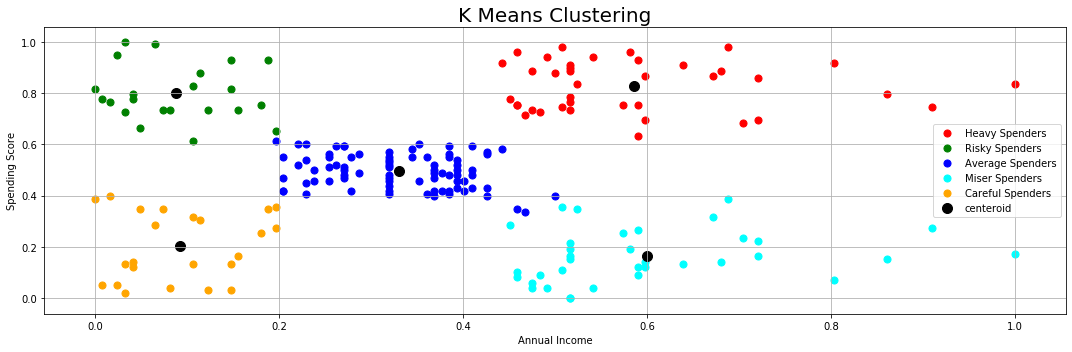

In [44]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
x=scaled[:,2:]
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'red', label = 'Heavy Spenders')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'green', label = 'Risky Spenders')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'blue', label = 'Average Spenders')
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'cyan', label = 'Miser Spenders')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange', label = 'Careful Spenders')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 100, c = 'black' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
save_fig('K-Means Cluster 1')
plt.show()

In [49]:
mall_data['cluster_id'] = y_means
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_id
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [50]:
mall_data['cluster_id'].replace([0,1,2,3,4],['Miser Spenders','Risky Spenders','Heavy Spenders','Average Spenders','Careful Spenders'],inplace=True)

In [52]:
mall_data.to_csv('clustered_data.csv')

## Observations and Conclusion



a. High Income, High Spending Score (Heavy Spenders)
- Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.
- Most of the customers in this segment are young (25-40). Hence, youth centric products/sections to be enhanced
- Reward Programmes on high expenditure must be promoted in order to enhance spending & loyalty among these customers
- Recommendation Programmes can be promoted so that these customers can bring in similar crowd

b. High Income, Low Spending Score (Miser Spenders) - Target these customers by asking the feedback and advertising the product in a better way to convert them into Heavy Spender customers.

c. Average Income, Average Spending Score (Average Spenders) - Can target these set of customers by providing them with Low cost EMI's etc.

d. Low Income, High Spending Score (Risky Spenders) - May or may not target these group of customers based on the policy of the mall.

e. Low Income, Low Spending Score (Careful Spenders) - Don't target these customers since they have less income and need to save money.